# 가위바위보 분류기 만들기

### 1.데이터 불러오고, resize

In [5]:
#PIL 라이브러리 불러오기
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!") 

PIL 라이브러리 import 완료!


In [6]:
#가위 이미지 사이즈 변경(28x28)
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

  # 이미지를 불러와 파일마다 모두 28x28 사이즈로 바꾸어 저장
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [7]:
#바위 이미지 사이즈 변경(28x28)
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

  # 이미지를 불러와 파일마다 모두 28x28 사이즈로 바꾸어 저장
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [8]:
#보 이미지 사이즈 변경(28x28)
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

  # 이미지를 불러와 파일마다 모두 28x28 사이즈로 바꾸어 저장
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [9]:
#가위, 바위, 보 데이터를 읽을 수 있는 load_data() 함수로 데이터 불러오기
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    #라벨링 -> 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


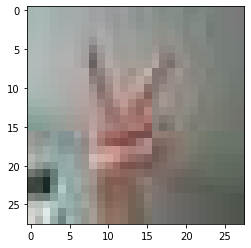

In [10]:
#이미지 불러오기
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

### 2. 네트워크 설계

In [15]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation = 'relu')) 
model.add(keras.layers.Dense(3, activation = 'softmax')) #가위,바위,보 3개니까 3

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_9 (Dense)              (None, 3)                

### 3. 네트워크 학습

In [16]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

model.fit(x_train_norm, y_train, epochs = 10) #10번반복

Epoch 1/10
10/10 [==============================] - 26s 21ms/step - loss: 1.1074 - accuracy: 0.3000
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0621 - accuracy: 0.7100
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0206 - accuracy: 0.8867
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.9554 - accuracy: 0.9400
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.8529 - accuracy: 0.9633
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.6966 - accuracy: 0.9867
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.5078 - accuracy: 0.9967
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.3189 - accuracy: 0.9967
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1796 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1048 - accuracy: 1.0000


### 4. 성능 평가 테스트

In [17]:
#샘플 가위 이미지 사이즈 변경(28x28)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)  

print("가위 샘플 이미지 resize 완료!")

102  images to be resized.
102  images resized.
가위 샘플 이미지 resize 완료!


In [18]:
#샘플 바위 이미지 사이즈 변경(28x28)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

print("바위 샘플 이미지 resize 완료!")

99  images to be resized.
99  images resized.
바위 샘플 이미지 resize 완료!


In [19]:
#샘플 보 이미지 사이즈 변경(28x28)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

print("보 샘플 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 샘플 이미지 resize 완료!


In [20]:
#가위, 바위, 보 데이터를 읽을 수 있는 load_data() 함수로 데이터 불러오기
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path, 301) #x_test,y_test만들기
x_test_norm = x_test/255.0 

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 301 입니다.
x_test shape: (301, 28, 28, 3)
y_test shape: (301,)


라벨:  0


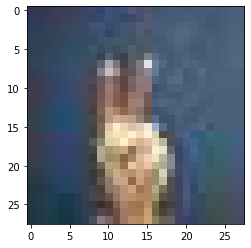

In [21]:
#이미지 불러오기
import matplotlib.pyplot as plt

plt.imshow(x_test_norm[0])
print('라벨: ', y_test[0])

In [22]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose = 2)

print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

10/10 - 0s - loss: 153.9361 - accuracy: 0.5748
test_loss : 153.93612670898438
test_accuracy : 0.5747508406639099


In [31]:
predicted_result = model.predict(x_test)  
predicted_labels = np.argmax(predicted_result, axis=1)

예측확률분포: [1.2298863e-13 0.0000000e+00 1.0000000e+00]
라벨: 0, 예측결과: 2


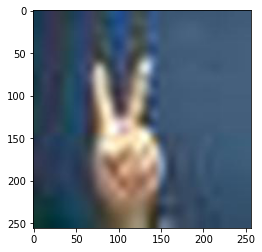

예측확률분포: [0. 0. 1.]
라벨: 1, 예측결과: 2


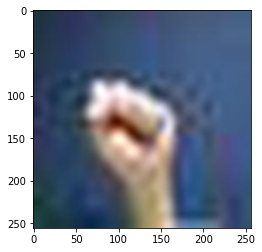

예측확률분포: [0. 0. 1.]
라벨: 1, 예측결과: 2


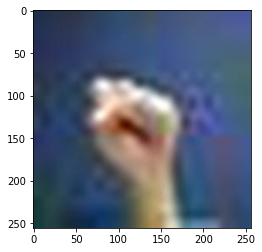

예측확률분포: [0. 0. 1.]
라벨: 1, 예측결과: 2


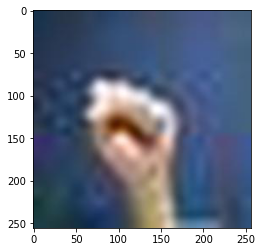

예측확률분포: [0. 0. 1.]
라벨: 0, 예측결과: 2


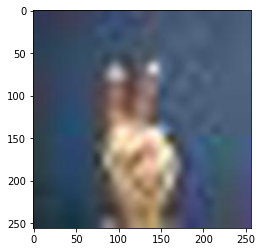

In [32]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

성능 평가 결과, **약 57%의 정확도**가 나왔다.

정확도를 높이기 위해
(1)데이터 크기 28->122, (2)데이터 셋 개수를 늘려 다시 시도해보겠다.

---

### 1.데이터 불러오고, resize

In [33]:
#PIL 라이브러리 불러오기
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!") 

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

  # 이미지를 불러와 파일마다 모두 122사이즈로 바꾸어 저장
    target_size=(122,122)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
    
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

PIL 라이브러리 import 완료!
509  images to be resized.
509  images resized.
가위 이미지 resize 완료!
651  images to be resized.
651  images resized.
바위 이미지 resize 완료!
767  images to be resized.
767  images resized.
보 이미지 resize 완료!


In [34]:
#가위, 바위, 보 데이터를 읽을 수 있는 load_data() 함수로 데이터 불러오기
import numpy as np

def load_data(img_path, number_of_data=1927):  # 가위바위보 이미지 개수 총합에 주의하세요.
    #라벨링 -> 가위 : 0, 바위 : 1, 보 : 2
    img_size=122
    color=3
    
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1927 입니다.
x_train shape: (1927, 122, 122, 3)
y_train shape: (1927,)


라벨:  0


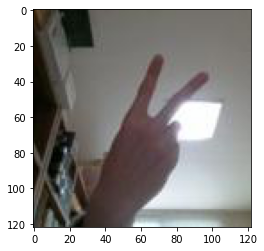

In [35]:
#이미지 불러오기
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

### 2. 네트워크 설계

In [36]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape=(122, 122, 3)))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation = 'relu')) 
model.add(keras.layers.Dense(3, activation = 'softmax')) #가위,바위,보 3개니까 3

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 120, 120, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 60, 60, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 58, 58, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 29, 29, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 26912)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                861216    
_________________________________________________________________
dense_13 (Dense)             (None, 3)                

### 3. 네트워크 학습

In [37]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

model.fit(x_train_norm, y_train, epochs = 10) #10번반복

Epoch 1/10
61/61 [==============================] - 1s 10ms/step - loss: 0.7688 - accuracy: 0.6689
Epoch 2/10
61/61 [==============================] - 0s 7ms/step - loss: 0.1578 - accuracy: 0.9595
Epoch 3/10
61/61 [==============================] - 0s 7ms/step - loss: 0.0509 - accuracy: 0.9907
Epoch 4/10
61/61 [==============================] - 0s 7ms/step - loss: 0.0254 - accuracy: 0.9958
Epoch 5/10
61/61 [==============================] - 0s 7ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 6/10
61/61 [==============================] - 0s 7ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 7/10
61/61 [==============================] - 0s 7ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 8/10
61/61 [==============================] - 0s 7ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 9/10
61/61 [==============================] - 0s 7ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 10/10
61/61 [==============================] - 0s 7ms/step - loss: 0.0012 - accuracy: 1.0000


### 4. 성능 평가 테스트

In [38]:
#샘플 가위 이미지 사이즈 변경(28x28)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)  

print("가위 샘플 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 샘플 이미지 resize 완료!


In [39]:
#샘플 바위 이미지 사이즈 변경(28x28)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

print("바위 샘플 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 샘플 이미지 resize 완료!


In [40]:
#샘플 보 이미지 사이즈 변경(28x28)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

print("보 샘플 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 샘플 이미지 resize 완료!


In [41]:
#가위, 바위, 보 데이터를 읽을 수 있는 load_data() 함수로 데이터 불러오기
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path, 301) #x_test,y_test만들기
x_test_norm = x_test/255.0 

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (301, 122, 122, 3)
y_test shape: (301,)


라벨:  0


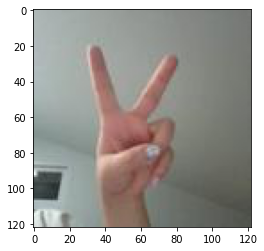

In [42]:
#이미지 불러오기
import matplotlib.pyplot as plt

plt.imshow(x_test_norm[0])
print('라벨: ', y_test[0])

In [43]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose = 2)

print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

10/10 - 0s - loss: 20.8176 - accuracy: 0.8605
test_loss : 20.817584991455078
test_accuracy : 0.8604651093482971


In [44]:
predicted_result = model.predict(x_test)  
predicted_labels = np.argmax(predicted_result, axis=1)

예측확률분포: [0. 0. 1.]
라벨: 0, 예측결과: 2


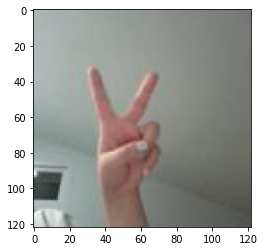

예측확률분포: [0.0000000e+00 1.0000000e+00 2.1572504e-20]
라벨: 2, 예측결과: 1


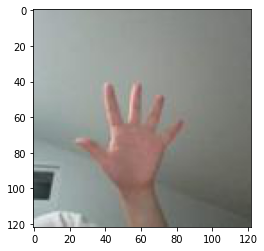

예측확률분포: [0. 0. 1.]
라벨: 0, 예측결과: 2


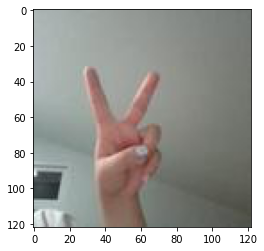

예측확률분포: [0.000000e+00 9.999980e-01 1.988773e-06]
라벨: 2, 예측결과: 1


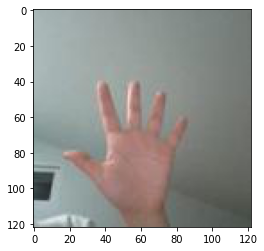

예측확률분포: [0. 1. 0.]
라벨: 2, 예측결과: 1


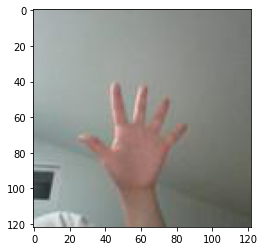

In [45]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

최종적으로 성능 평가 결과, **약 86%의 정확도**가 나왔다!

예측 확률 분포 결과를 보니, 아무리 정확도가 86%더라도 육안으로 파악 가능한 이미지를 예측하지 못했다는 것을 확인 할 수 있었다. 
정확도를 높이기 위해서는 더 많은 데이터 셋을 수집하고 밝기, 장소(background)등을 조정하면 정확도가 높아질 것으로 예상된다.

---


2022-01-09

---